In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [2]:
#extração de x e y

x, y = df[['temperatura']].values, df[['classification']].values

print("X:\n", x)
print("Y:\n", y)

X:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
Y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
y = le.fit_transform(y.ravel())

print ("y:\n", y)

y:
 [3 2 3 3 0 1]


In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
#Classificador

clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression()

In [7]:
#gerando 100 valroe de tempratura linearmente espaçados entre 0 e 45
#predicção em novos valores de temperatura

x_test = np.linspace(start=0., stop=45., num=100).reshape(-1,1)

#predição dos valores

y_pred = clf.predict(x_test)

In [8]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
#conversão de y_pred para os valroes originais

y_pred = le.inverse_transform(y_pred)

y_pred

array(['frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio', 'frio',
       'frio', 'frio', 'confortavel', 'confortavel', 'confortavel',
       'confortavel', 'confortavel', 'confortavel', 'quente', 'quente',
       'quente', 'quente', 'quente', 'quente', 'quente', 'quente',
       'quente', 'quente', 'quente', 'quente', 'muito quente',
       'muito quente', 'muito quente', 'muito quente', 'muito quente',
       'muito quente', 'muito quente', 'muito quente', 'muito quente',
       'muito quente', 'muito quente', 'muito quente', 'muito quente',
       'muito quente', 'muito quente', 'muito quente', 'muito quente',
       'muito quente

In [11]:
#output

output = {'new_temp': x_test.ravel(),
         'new_class': y_pred.ravel()}

output = pd.DataFrame(output)

In [12]:
output

,new_temp,new_class
0,0.000000,frio
1,0.454545,frio
2,0.909091,frio
3,1.363636,frio
4,1.818182,frio
...,...,...
95,43.181818,muito quente
96,43.636364,muito quente
97,44.090909,muito quente
98,44.545455,muito quente


In [13]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [14]:
output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


<AxesSubplot:title={'center':'# de novos valores gerados'}>

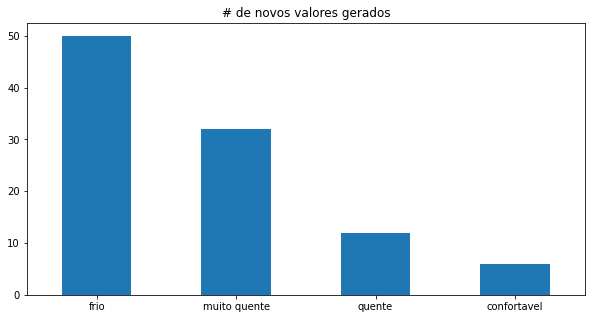

In [16]:
output['new_class'].value_counts().plot.bar(figsize=(10, 5),
                                            rot=0,
                                            title="# de novos valores gerados")

<AxesSubplot:title={'center':'new_temp'}, xlabel='[new_class]'>

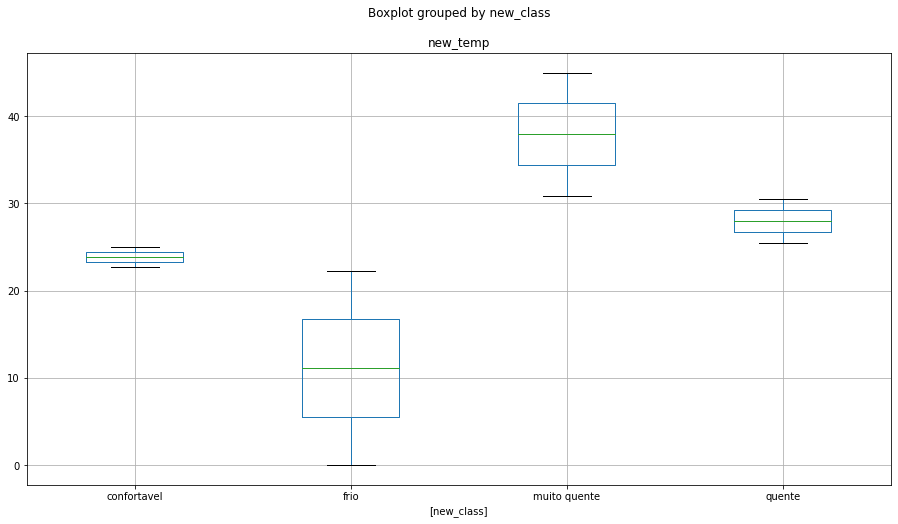

In [19]:
output.boxplot(by='new_class', figsize=(15,8))

In [20]:
#Sistema automático

def classify_temp():
    """Classifica o input do usuário"""
    
    ask = True
    
    while ask:
        temp = input("Insira a temperatura: ")
        
        temp = np.array(float(temp)).reshape(-1, 1)
        
        class_temp = clf.predict(temp)
        
        class_temp = le.inverse_transform(class_temp)
        
        print(f"A Classificação da temperatura {temp.ravel()[0]} é:", class_temp[0])
        
        ask = input("Nova classificação y/n?: ") == 'y'

In [21]:
classify_temp()

Insira a temperatura:  20


A Classificação da temperatura 20.0 é: frio


Nova classificação y/n?:  y
Insira a temperatura:  50


A Classificação da temperatura 50.0 é: muito quente


Nova classificação y/n?:  


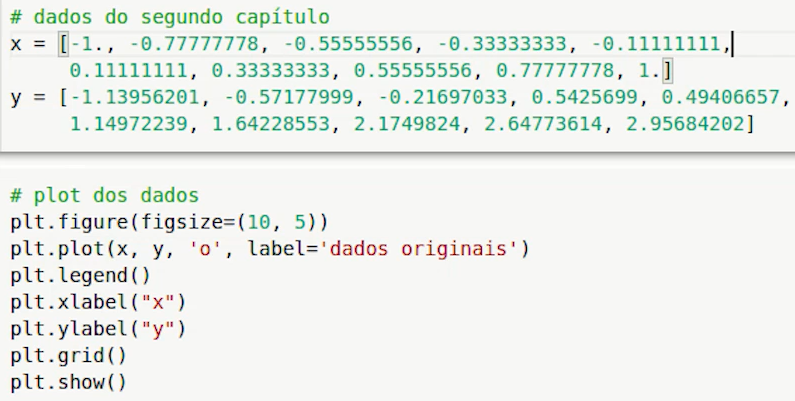

## Regressão linear

In [23]:
x = [-1., -0.77777778, -0.55555556, -0.3333333, -0.1111111,
    0.11111111, 0.333333, 0.555555556, 0.77777778, 1.]
y = [-1.13956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657, 1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684202]

In [27]:
import matplotlib.pyplot as plt

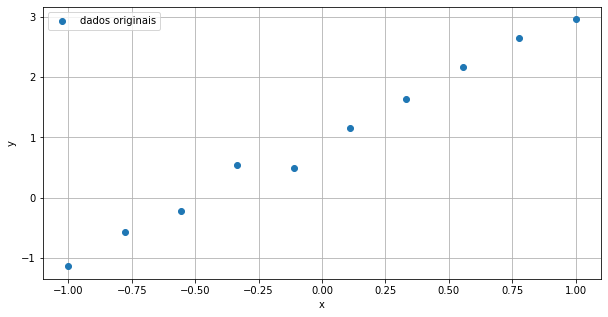

In [29]:
plt.figure(figsize = (10,5))
plt.plot(x, y, 'o', label = "dados originais")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [30]:
#transformando em np array

x, y = np.array(x).reshape(-1,1), np.array(y).reshape(-1,1)

In [31]:
from sklearn.linear_model import LinearRegression

In [34]:
#treinando o modelo

reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [36]:
print("a estimado: ", reg.coef_.ravel()[0])
print("b estimado: ", reg.intercept_[0])

a estimado:  2.0541495763089084
b estimado:  0.9679893223919975


In [37]:
#predição do modelo

y_pred = reg.predict(x)

In [38]:
#score do modelo

score = reg.score(x, y)
print(score)

0.9911602696516139


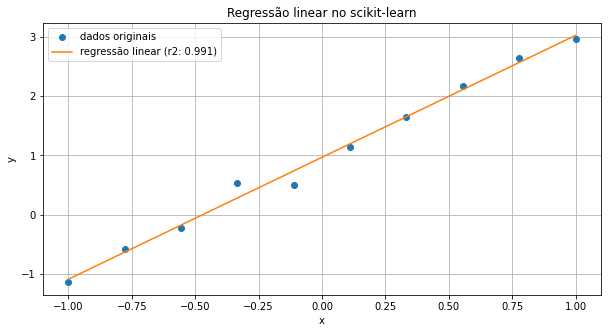

In [39]:
plt.figure(figsize = (10,5))
plt.plot(x, y, 'o', label = "dados originais")
plt.plot(x, y_pred, label = "regressão linear (r2: {:.3f})".format(score))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

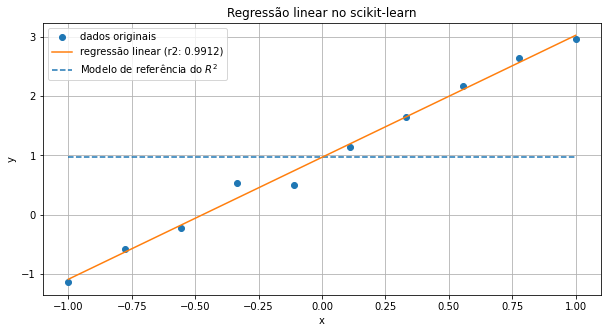

In [40]:
plt.figure(figsize = (10,5))
plt.plot(x, y, 'o', label = "dados originais")
plt.plot(x, y_pred, label = "regressão linear (r2: {:.4f})".format(score))
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle = 'dashed', label = "Modelo de referência do $R^2$")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

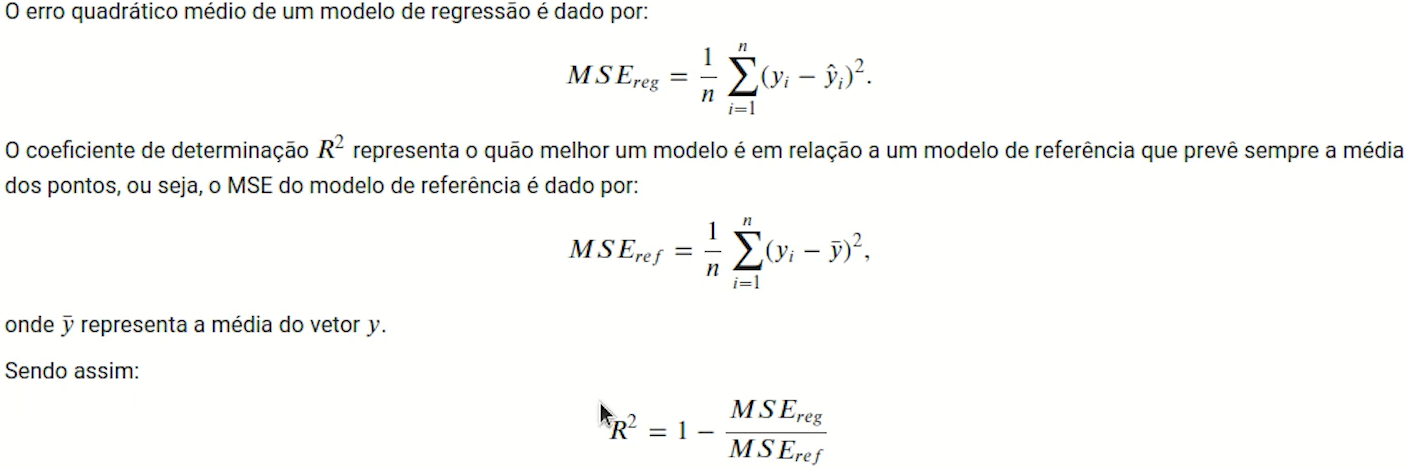

In [41]:
#Calculo do MSE

def mse(y_true, y_pred, is_ref=False):
    if is_ref:
        mse = ((y_true - y_true.mean())**2).mean()
    else:
        mse = ((y_true - y_pred)**2).mean()
        
    return mse

In [42]:
#Cálculo do coeficiente de determinação R2

def r2(mse_reg, mse_ref):
    return 1 - mse_reg/mse_ref

In [43]:
#visualizando y e y_pred

print("y_true:", y.ravel())
print("y_pred:", y_pred.ravel())

y_true: [-1.13956201 -0.57177999 -0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.95684202]
y_pred: [-1.08616025 -0.62968257 -0.1732049   0.28327287  0.7397505   1.19622816
  1.65270516  2.10918353  2.56566122  3.0221389 ]


In [45]:
#mse dos modelos

mse_reg = mse(y_true = y, y_pred = y_pred)
print("MSE domodelo de regressão:", mse_reg)

mse_ref = mse(y_true = y, y_pred = y_pred, is_ref=True)
print("MSE domodelo de referência:", mse_ref)

MSE domodelo de regressão: 0.015331623886588958
MSE domodelo de referência: 1.734399498892871


In [46]:
#Score retornado pelo scikit-learn

r2_score_skl = reg.score(x, y)
print("Coeficiente R3 do modelo skl:", r2_score_skl)

Coeficiente R3 do modelo skl: 0.9911602696516139
